In [137]:
import numpy as np
import pandas as pd

%matplotlib inline

In [82]:
#Testing potential models

In [85]:
closes = pd.read_csv("../Notebooks/Data/Cleaned_Data/stock_data.csv", index_col="date", infer_datetime_format=False, parse_dates=True)
closes.head()

,ticker,close,volume
date,,,
2015-12-01,NFLX,125.37,12550755
2015-12-02,NFLX,128.93,24105712
2015-12-03,NFLX,126.81,26644540
2015-12-04,NFLX,130.93,20250411
2015-12-07,NFLX,125.36,23351531


In [86]:
closes.sort_index()
closes.tail()

,ticker,close,volume
date,,,
2022-05-25,SOFI,7.01,35468235
2022-05-26,SOFI,7.14,35042166
2022-05-27,SOFI,7.55,38222764
2022-05-31,SOFI,7.48,61194845
2022-06-01,SOFI,7.05,36626131


In [88]:
closes = closes.drop(columns='volume')
closes.head()

,ticker,close
date,,
2015-12-01,NFLX,125.37
2015-12-02,NFLX,128.93
2015-12-03,NFLX,126.81
2015-12-04,NFLX,130.93
2015-12-07,NFLX,125.36


In [89]:
closes_pivot = closes.pivot_table('close', ['date'], 'ticker')
closes_pivot

ticker,ABNB,BLK,DVN,FANG,FB,MCHP,MELI,MRO,MTRX,NFLX,PYPL,REGI,SOFI,SPWR,UBER
date,,,,,,,,,,,,,,,
2015-12-01,NaN,361.73,46.49,78.20,107.12,48.49,125.56,17.63,22.94,125.37,35.17,8.88,NaN,25.11,NaN
2015-12-02,NaN,358.92,43.53,76.79,106.07,46.66,124.52,16.67,22.47,128.93,35.15,8.73,NaN,26.17,NaN
2015-12-03,NaN,352.00,41.10,76.75,104.38,46.43,120.65,16.55,22.91,126.81,34.23,8.72,NaN,27.13,NaN
2015-12-04,NaN,360.76,40.53,76.31,106.18,47.37,121.78,16.12,22.11,130.93,35.62,8.89,NaN,26.68,NaN
2015-12-07,NaN,355.47,36.44,73.85,105.61,46.68,119.80,14.78,21.21,125.36,35.16,8.34,NaN,26.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,110.40,626.60,71.94,141.75,183.83,68.06,723.00,29.01,5.79,187.83,80.12,61.30,7.01,16.46,22.04
2022-05-26,114.30,652.44,73.81,146.43,191.63,70.06,783.44,29.75,5.84,191.40,80.42,61.37,7.14,17.03,23.10
2022-05-27,120.50,666.53,75.80,152.66,195.13,72.79,811.44,31.07,6.11,195.19,85.21,61.33,7.55,18.19,23.67


In [90]:
closes_df = pd.DataFrame(closes_pivot)
closes_df

ticker,ABNB,BLK,DVN,FANG,FB,MCHP,MELI,MRO,MTRX,NFLX,PYPL,REGI,SOFI,SPWR,UBER
date,,,,,,,,,,,,,,,
2015-12-01,NaN,361.73,46.49,78.20,107.12,48.49,125.56,17.63,22.94,125.37,35.17,8.88,NaN,25.11,NaN
2015-12-02,NaN,358.92,43.53,76.79,106.07,46.66,124.52,16.67,22.47,128.93,35.15,8.73,NaN,26.17,NaN
2015-12-03,NaN,352.00,41.10,76.75,104.38,46.43,120.65,16.55,22.91,126.81,34.23,8.72,NaN,27.13,NaN
2015-12-04,NaN,360.76,40.53,76.31,106.18,47.37,121.78,16.12,22.11,130.93,35.62,8.89,NaN,26.68,NaN
2015-12-07,NaN,355.47,36.44,73.85,105.61,46.68,119.80,14.78,21.21,125.36,35.16,8.34,NaN,26.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,110.40,626.60,71.94,141.75,183.83,68.06,723.00,29.01,5.79,187.83,80.12,61.30,7.01,16.46,22.04
2022-05-26,114.30,652.44,73.81,146.43,191.63,70.06,783.44,29.75,5.84,191.40,80.42,61.37,7.14,17.03,23.10
2022-05-27,120.50,666.53,75.80,152.66,195.13,72.79,811.44,31.07,6.11,195.19,85.21,61.33,7.55,18.19,23.67


In [91]:
#Fill missing values with previous
closes_df = closes_df.fillna(method='pad')
closes_df

ticker,ABNB,BLK,DVN,FANG,FB,MCHP,MELI,MRO,MTRX,NFLX,PYPL,REGI,SOFI,SPWR,UBER
date,,,,,,,,,,,,,,,
2015-12-01,NaN,361.73,46.49,78.20,107.12,48.49,125.56,17.63,22.94,125.37,35.17,8.88,NaN,25.11,NaN
2015-12-02,NaN,358.92,43.53,76.79,106.07,46.66,124.52,16.67,22.47,128.93,35.15,8.73,NaN,26.17,NaN
2015-12-03,NaN,352.00,41.10,76.75,104.38,46.43,120.65,16.55,22.91,126.81,34.23,8.72,NaN,27.13,NaN
2015-12-04,NaN,360.76,40.53,76.31,106.18,47.37,121.78,16.12,22.11,130.93,35.62,8.89,NaN,26.68,NaN
2015-12-07,NaN,355.47,36.44,73.85,105.61,46.68,119.80,14.78,21.21,125.36,35.16,8.34,NaN,26.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,110.40,626.60,71.94,141.75,183.83,68.06,723.00,29.01,5.79,187.83,80.12,61.30,7.01,16.46,22.04
2022-05-26,114.30,652.44,73.81,146.43,191.63,70.06,783.44,29.75,5.84,191.40,80.42,61.37,7.14,17.03,23.10
2022-05-27,120.50,666.53,75.80,152.66,195.13,72.79,811.44,31.07,6.11,195.19,85.21,61.33,7.55,18.19,23.67


In [139]:
uber_sent_df = pd.read_csv('../Notebooks/Data/Cleaned_Data/UBER.csv', index_col=0)
uber_sent_df.head()

,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,close,volume
2019-05-10,0.060230,0.085886,0.841045,0.073045,41.57,189836990.0
2019-05-13,0.006767,0.069667,0.877000,0.053333,37.10,79478203.0
2019-05-14,0.006767,0.069667,0.877000,0.053333,39.96,46661187.0
2019-05-15,0.000000,0.000000,1.000000,0.000000,41.29,36086872.0
2019-05-16,-0.485750,0.037000,0.881500,0.081500,43.00,38115524.0


In [140]:
# function to filter through all csv files in Cleaned_Data and return dataframe for a ticker
import os 
def stock_picker(ticker):

    stock_df_list = []
    file_path = '../Notebooks/Data/Cleaned_Data'

    for filename in os.listdir(file_path):
        if filename.endswith(".csv") and filename != 'Ticker_library.csv':
            csv_df = pd.read_csv(file_path +'/'+ filename, parse_dates=True, infer_datetime_format=True,index_col='datetime')
            csv_df = csv_df.loc[csv_df['ticker'] == ticker]
            csv_df.drop(columns='ticker',axis=1,inplace=True)
            #csv_df.set_index('date',inplace=True)
            stock_df_list.append(csv_df)
    all_ticker_data_df = pd.concat(stock_df_list,axis=1,join='outer')
    all_ticker_data_df.insert(0, 'ticker', ticker)
    return all_ticker_data_df.drop(columns='Unnamed: 0')

In [141]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [142]:
window_size = 30

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 0
target_column = 4
X, y = window_data(uber_sent_df, window_size, feature_column, target_column)

In [143]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]


In [144]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [145]:
# Reshape the features for the model

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [147]:
model = Sequential()

number_units = 5
dropout_fraction = 0.2

#Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

#Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

#Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

#Output Layer
model.add(Dense(1))

In [148]:
model.compile(optimizer='adam', loss = 'mean_squared_error')


In [149]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 5)             140       
                                                                 
 dropout_9 (Dropout)         (None, 30, 5)             0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 5)             220       
                                                                 
 dropout_10 (Dropout)        (None, 30, 5)             0         
                                                                 
 lstm_11 (LSTM)              (None, 5)                 220       
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [150]:
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)


Epoch 1/10
517/517 [==============================] - 11s 13ms/step - loss: 0.0347
Epoch 2/10
517/517 [==============================] - 7s 14ms/step - loss: 0.0191
Epoch 3/10
517/517 [==============================] - 7s 13ms/step - loss: 0.0167
Epoch 4/10
517/517 [==============================] - 7s 14ms/step - loss: 0.0164
Epoch 5/10
517/517 [==============================] - 7s 14ms/step - loss: 0.0164
Epoch 6/10
517/517 [==============================] - 7s 14ms/step - loss: 0.0184
Epoch 7/10
517/517 [==============================] - 7s 13ms/step - loss: 0.0180
Epoch 8/10
517/517 [==============================] - 7s 14ms/step - loss: 0.0211
Epoch 9/10
517/517 [==============================] - 7s 13ms/step - loss: 0.0245
Epoch 10/10
517/517 [==============================] - 7s 14ms/step - loss: 0.0254


In [151]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.0741


0.07405579835176468

In [152]:
predict = model.predict(X_test)

7/7 [==============================] - 1s 5ms/step


In [153]:
predicted_prices = scaler.inverse_transform(predict)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [156]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = uber_sent_df.index[-len(real_prices): ]) 
stocks.tail()

,Real,Predicted
2022-05-23,23.35,49.958981
2022-05-24,23.78,49.958424
2022-05-25,21.55,49.956051
2022-05-26,22.04,49.953812
2022-05-27,23.10,49.951931


<AxesSubplot:>

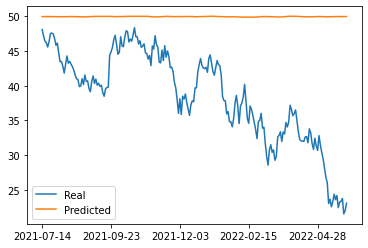

In [157]:
stocks.plot()

MC model

In [136]:
uber_sec = pd.read_csv('../Notebooks/Data/Cleaned_Data/SEC_Fin_Data/UBER_SEC_Fin_data', index_col = [0])
uber_sec.head()

,index,Revenues,CostOfGoodsAndServiceExcludingDepreciationDepletionAndAmortization,OperationsAndSupportExpense,SellingAndMarketingExpense,ResearchAndDevelopmentExpense,GeneralAndAdministrativeExpense,DepreciationDepletionAndAmortization,CostsAndExpenses,OperatingIncomeLoss,...,ProfitLoss,Unnamed: 17,Unnamed: 18,NetIncomeLoss,EarningsPerShareBasic,EarningsPerShareDiluted,WeightedAverageNumberOfSharesOutstandingBasic,WeightedAverageNumberOfDilutedSharesOutstanding,NetIncomeLossAttributableToNoncontrollingInterest,Ticker
0,2017-01-01-2017-12-31,7932000000,4160000000,1354000000,2524000000,1201000000,2263000000,510000000,12012000000,-4080000000,...,-4033000000,NaN,NaN,-4033000000,-9.46,-9.46,426360000,426360000,0.0,UBER
1,2018-01-01-2018-03-31,2584000000,1156000000,372000000,677000000,340000000,429000000,88000000,3062000000,-478000000,...,3748000000,NaN,0.0,3748000000,2.00,1.84,437065000,475153000,NaN,UBER
2,2018-01-01-2018-06-30,5352000000,2498000000,721000000,1392000000,705000000,1067000000,186000000,6569000000,-1217000000,...,2870000000,NaN,0.0,2870000000,1.33,1.20,439022000,476394000,NaN,UBER
3,2018-01-01-2018-09-30,8296000000,4008000000,1108000000,2177000000,1139000000,1527000000,317000000,10276000000,-1980000000,...,1876000000,-8000000.0,NaN,1884000000,0.59,0.52,441301000,477592000,NaN,UBER
4,2018-01-01-2018-12-31,11270000000,5623000000,1516000000,3151000000,1505000000,2082000000,426000000,14303000000,-3033000000,...,987000000,NaN,NaN,997000000,0.00,0.00,443368000,478999000,-10000000.0,UBER
